In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
athletes = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

In [102]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [103]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# To get only summer olympics data

In [104]:
athletes = athletes[athletes['Season'] == 'Summer']

In [105]:
athletes.shape

(222552, 15)

In [106]:
athletes['NOC'].value_counts()

NOC
USA    15064
GBR    10917
FRA    10633
ITA     8217
GER     7622
       ...  
YMD        5
SSD        3
NBO        2
UNK        2
NFL        1
Name: count, Length: 230, dtype: int64

In [107]:
athletes['Medal'].isna().sum()

188464

In [108]:
athletes['Medal'].value_counts()

Medal
Gold      11459
Bronze    11409
Silver    11220
Name: count, dtype: int64

In [109]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [110]:
athletes = athletes.merge(regions,on='NOC',how='left')

In [111]:
athletes.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [112]:
athletes['region'].value_counts()

region
USA            15064
Germany        12377
UK             10917
France         10633
Russia          8855
               ...  
Kiribati          11
Brunei            10
Timor-Leste        8
Kosovo             8
South Sudan        3
Name: count, Length: 205, dtype: int64

In [113]:
athletes.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [114]:
athletes.duplicated().sum()

1385

In [115]:
athletes.drop_duplicates(inplace=True)

In [116]:
athletes.duplicated().sum()

0

# Applying One hot encoding to medals

In [117]:
pd.get_dummies(athletes['Medal']).astype('int')

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [118]:
athletes = pd.concat([athletes,pd.get_dummies(athletes['Medal']).astype('int')],axis=1)

# **Applying Group by on NOC to get medal tally**

In [119]:
athletes.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


# The above table is wrong as team gold medals are counted individually too!

In [120]:
athletes[(athletes['NOC'] == 'IND') & (athletes['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [121]:
medal_tally = athletes.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [122]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [123]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [124]:
medal_tally[medal_tally['region'] == 'India']

,region,Gold,Silver,Bronze,Total
46,India,9,7,12,28


In [125]:
years = athletes['Year'].unique().tolist()
years.sort()

In [126]:
years.insert(0,'Overall')

In [128]:
country = np.unique(athletes['region'].dropna().values).tolist()

In [129]:
country.insert(0,'Overall')

In [130]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [131]:
medal_df = athletes.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [133]:
# case 2
medal_df[medal_df['region'] == 'India'].head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
436,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN,0,0,0
437,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN,0,0,0
790,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0


In [135]:
medal_df[(medal_df['Year'] == 2016) & (medal_df['region'] == 'India')].head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
1015,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN,0,0,0
7065,4523,Seema Antil,F,33.0,182.0,92.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Discus Throw,NaN,India,NaN,0,0,0
8713,5562,Aditi Ashok,F,18.0,173.0,57.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN,India,NaN,0,0,0
9202,5868,Manu Attri,M,23.0,172.0,73.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Doubles,NaN,India,NaN,0,0,0
10070,6427,Lalita Shivaji Babar,F,27.0,166.0,50.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 3,000 metres Steeplechase",NaN,India,NaN,0,0,0


In [147]:
def fetch_medal_tally(df,year,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == year]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]
    
    if flag == 1:
        new_df = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=False).reset_index()    
    else:
        new_df = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    new_df['Total'] = new_df['Gold'] + new_df['Silver'] + new_df['Bronze']

    print(new_df)
    

In [141]:
fetch_medal_tally(2016,'USA')

  region  Gold  Silver  Bronze  Total
0    USA    46      37      38    121


In [150]:
fetch_medal_tally(2016,'Overall')

         region  Gold  Silver  Bronze  Total
0           USA    46      37      38    121
1            UK    27      23      17     67
2         China    26      18      26     70
3        Russia    19      17      20     56
4       Germany    17      10      15     42
..          ...   ...     ...     ...    ...
198     Ireland     0       2       0      2
199      Israel     0       0       2      2
200    Kiribati     0       0       0      0
201  Kyrgyzstan     0       0       0      0
202    Zimbabwe     0       0       0      0

[203 rows x 5 columns]


In [149]:
fetch_medal_tally('Overall','USA')

    Year  Gold  Silver  Bronze  Total
0   2016    46      37      38    121
1   2012    46      28      29    103
2   2008    36      39      35    110
3   2004    36      39      26    101
4   2000    36      24      31     91
5   1996    44      32      25    101
6   1992    37      34      37    108
7   1988    36      31      27     94
8   1984    82      61      30    173
9   1976    34      35      25     94
10  1972    33      31      30     94
11  1968    45      28      34    107
12  1964    36      26      28     90
13  1960    34      21      16     71
14  1956    32      25      17     74
15  1952    40      19      17     76
16  1948    38      27      19     84
17  1936    24      21      12     57
18  1932    44      36      30    110
19  1928    22      18      16     56
20  1924    45      27      27     99
21  1920    41      27      27     95
22  1912    26      18      19     63
23  1908    22      12      12     46
24  1906    12       5       6     23
25  1904    

# Overall Analysis
No of Editions<br>
No of cities<br>
No of sports<br>
No of athletes<br>
No of participating nations<br>

In [152]:
athletes['Year'].unique().shape[0]-1  # 1906 Athens Olympics Does'nt count!

28

In [156]:
athletes['City'].unique().shape[0]

23

In [158]:
athletes['Sport'].unique().shape[0]

52

In [160]:
athletes['Event'].unique().shape[0]

651

In [162]:
athletes['Name'].unique().shape[0]

116122

In [164]:
athletes['region'].unique().shape[0]

206

# nations vs year

In [165]:
nations_per_year = athletes.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index()

In [175]:
nations_per_year.rename(columns={'count':'No of Countries'},inplace=True)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='No of Countries'>

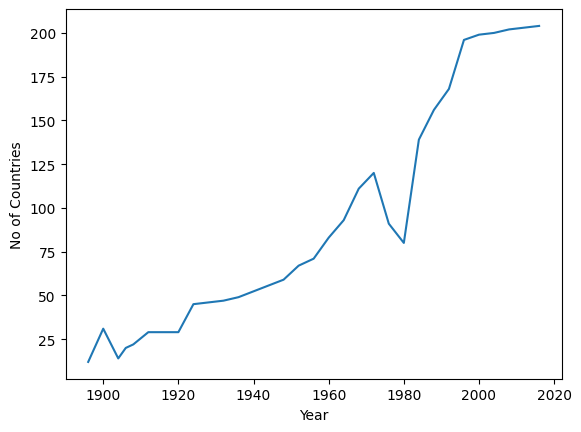

In [176]:
sns.lineplot(data=nations_per_year,x='Year',y='No of Countries') # 1980 olympics was boycotted by many countries

# events vs years

In [180]:
athletes['Event'].unique().shape

(651,)

In [181]:
events_per_year = athletes.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index()

In [182]:
events_per_year.rename(columns={'count':'No of Events'},inplace=True)

In [185]:
events_per_year[events_per_year['Year'] == 1920]

,Year,No of Events
14,1920,158


In [183]:
import plotly.express as px

In [184]:
fig = px.line(events_per_year,x='Year',y="No of Events")
fig.show()

# Athelets vs years


In [186]:
athletes_per_year = athletes.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index()
athletes_per_year.rename(columns={'count':'No of Athelets'},inplace=True)

In [188]:
fig = px.line(athletes_per_year,x='Year',y="No of Athelets")
fig.show()

In [190]:
heat_df = athletes.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

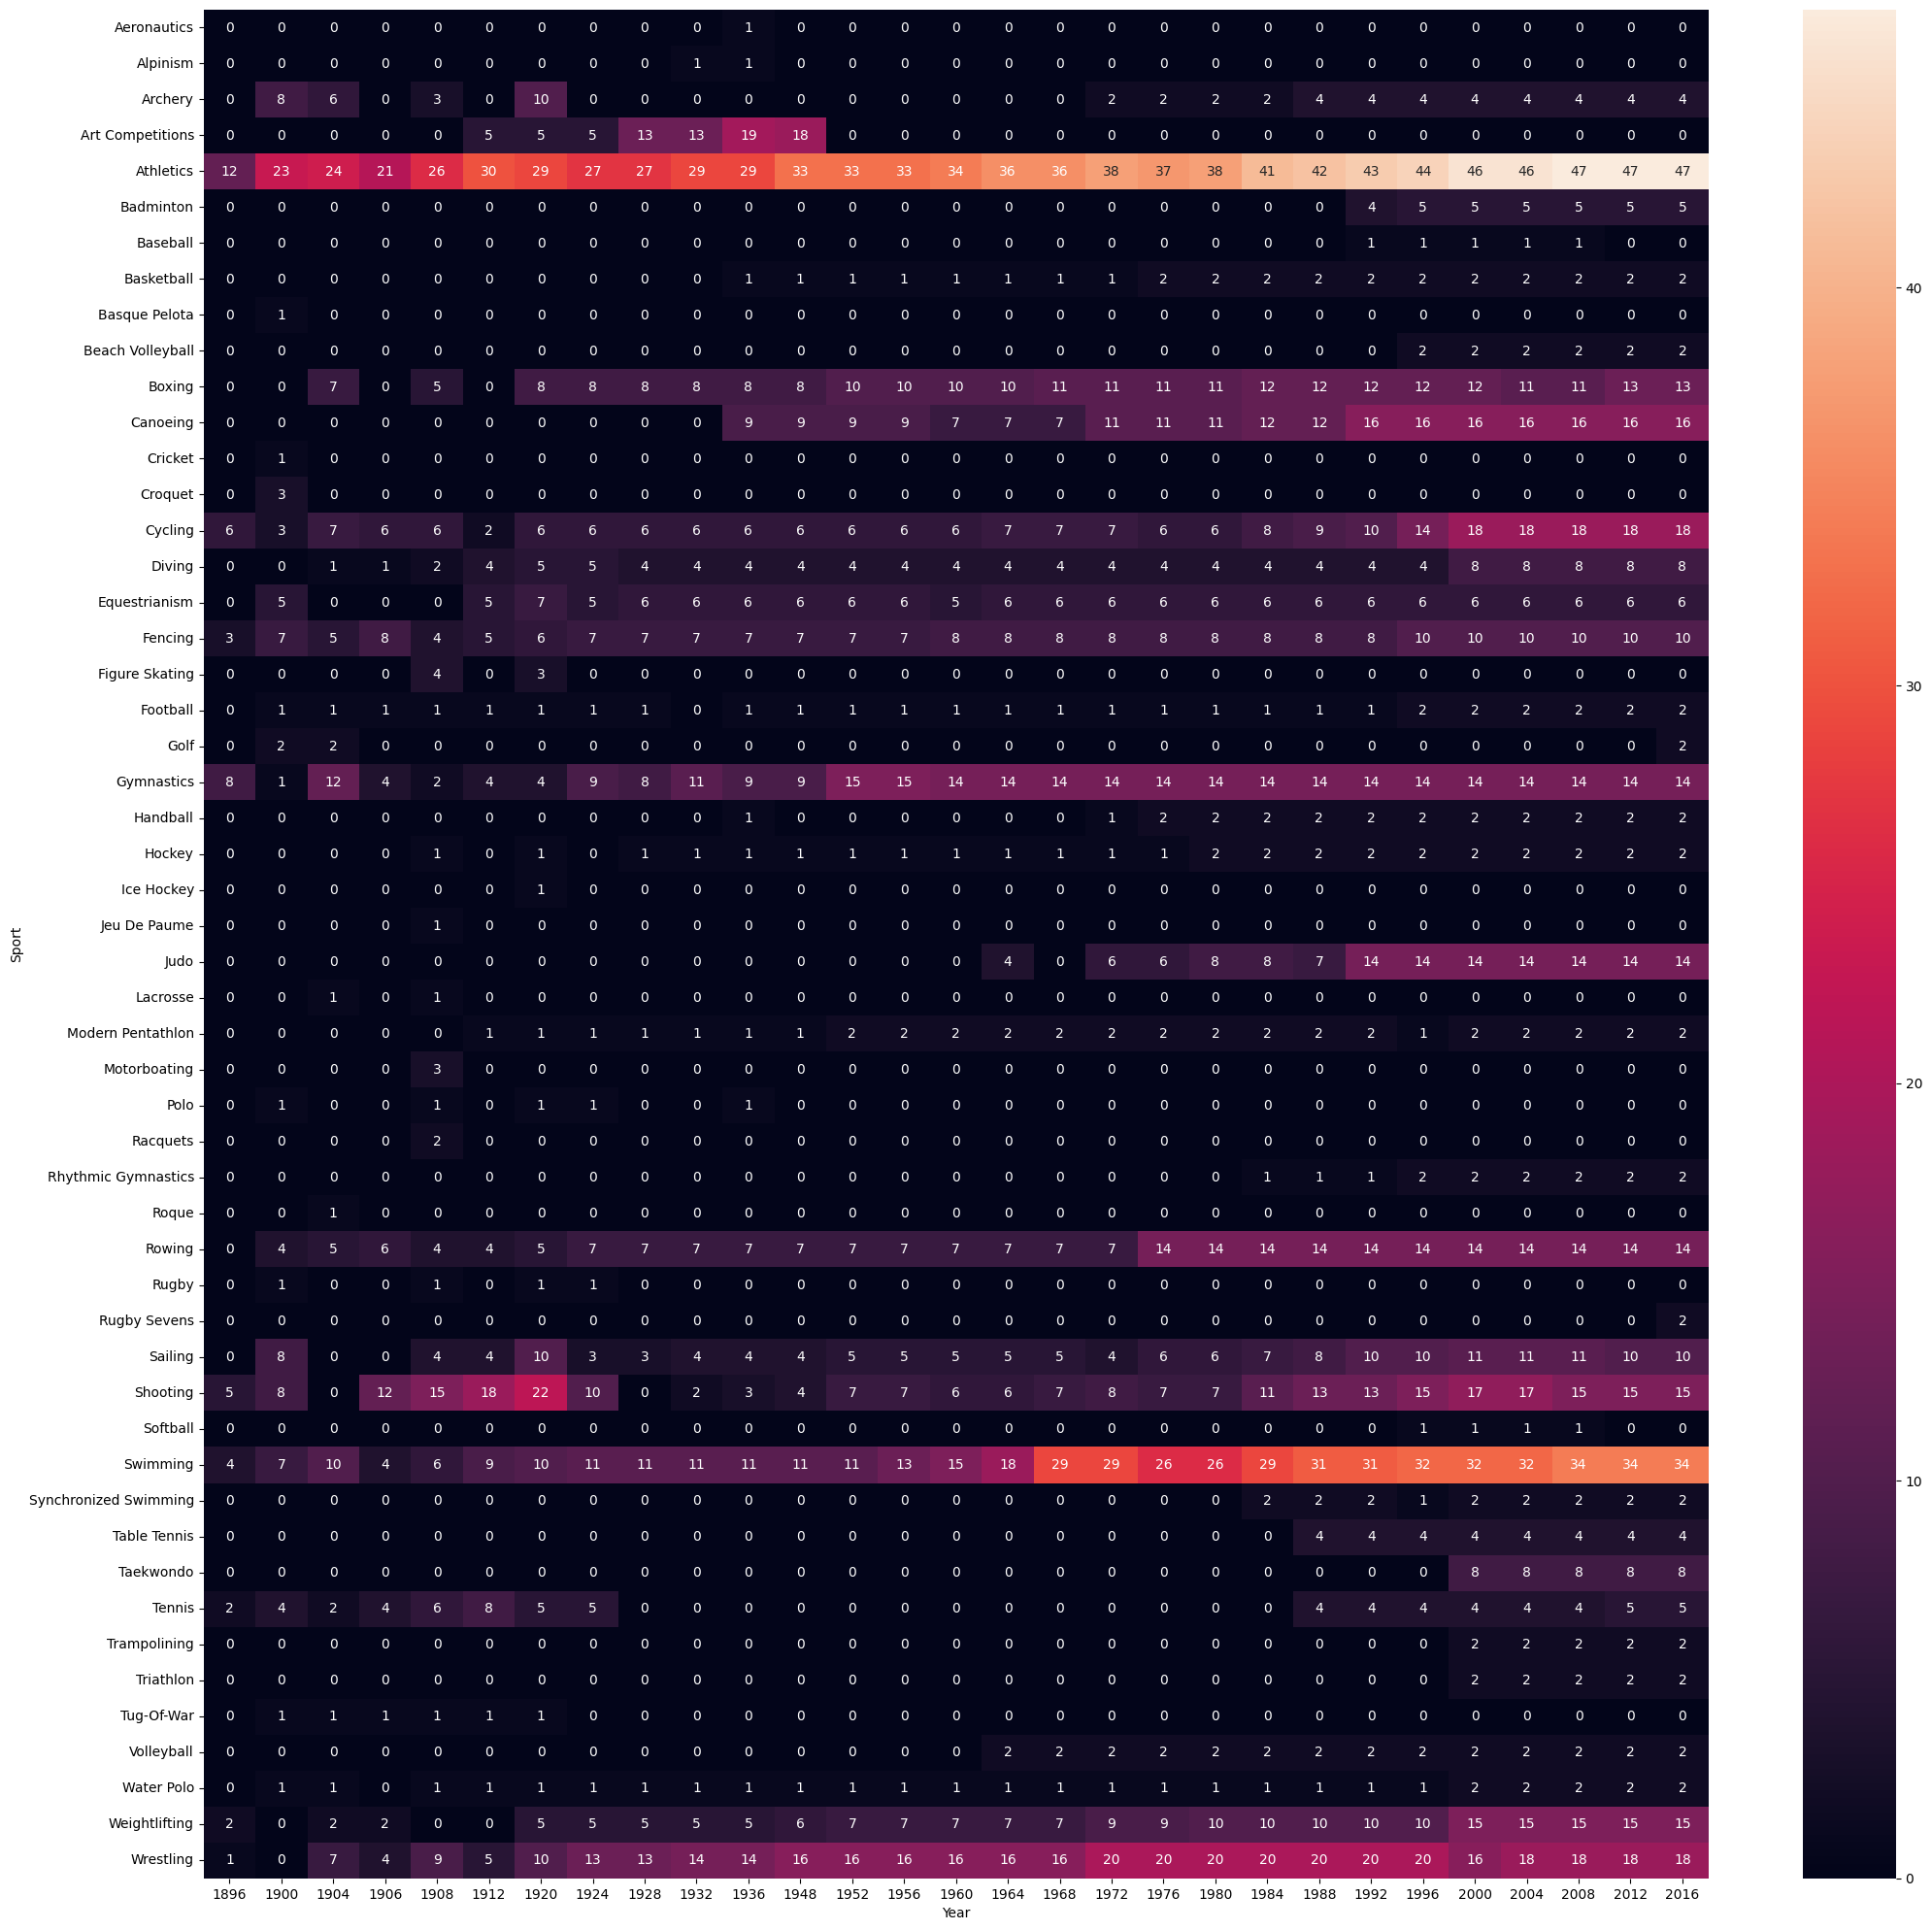

In [191]:
plt.figure(figsize=(25,25))
sns.heatmap(heat_df.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [260]:
# value_counts gives us the count column!! op!!
athletes.dropna(subset=['Medal'])[['Name']].value_counts().reset_index().head(10).merge(athletes,left_on='Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')

,Name,count,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Edoardo Mangiarotti,13,Fencing,Italy
111,Takashi Ono,13,Gymnastics,Japan
144,Birgit Fischer-Schmidt,12,Canoeing,Germany
157,Ryan Steven Lochte,12,Swimming,USA
171,Paavo Johannes Nurmi,12,Athletics,Finland
183,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA


In [261]:
def most_successful(df,sport,country):
    temp_df = df.dropna(subset=['Medal'])

    if country != 'Overall':
        temp_df = temp_df[temp_df['region'] == country]
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    return temp_df['Name'].value_counts().reset_index().head(10).merge(athletes,left_on = 'Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')

In [265]:
most_successful(athletes,'Overall','Overall')

,Name,count,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


# Country-wise
Country-wise medal tally<br>
Countries good at heatmap<br>
Most Successfull athletes<br>

In [225]:
country_medal_df = athletes.dropna(subset=['Medal'])

In [371]:
country_medal_df.shape

(16074, 20)

In [229]:
country_medal_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\Viral Modi\AppData\Local\Temp\ipykernel_22168\1612664177.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [253]:
new_df = country_medal_df[country_medal_df['region'] == 'India']  # India
final_df = new_df.groupby('Year').count()['Medal'].reset_index().sort_values('Year',ascending=False)

In [240]:
athletes['region'].unique().shape

(206,)

In [247]:
np.unique(athletes['region'].dropna().values).shape

(205,)

<Axes: xlabel='Year', ylabel='Sport'>

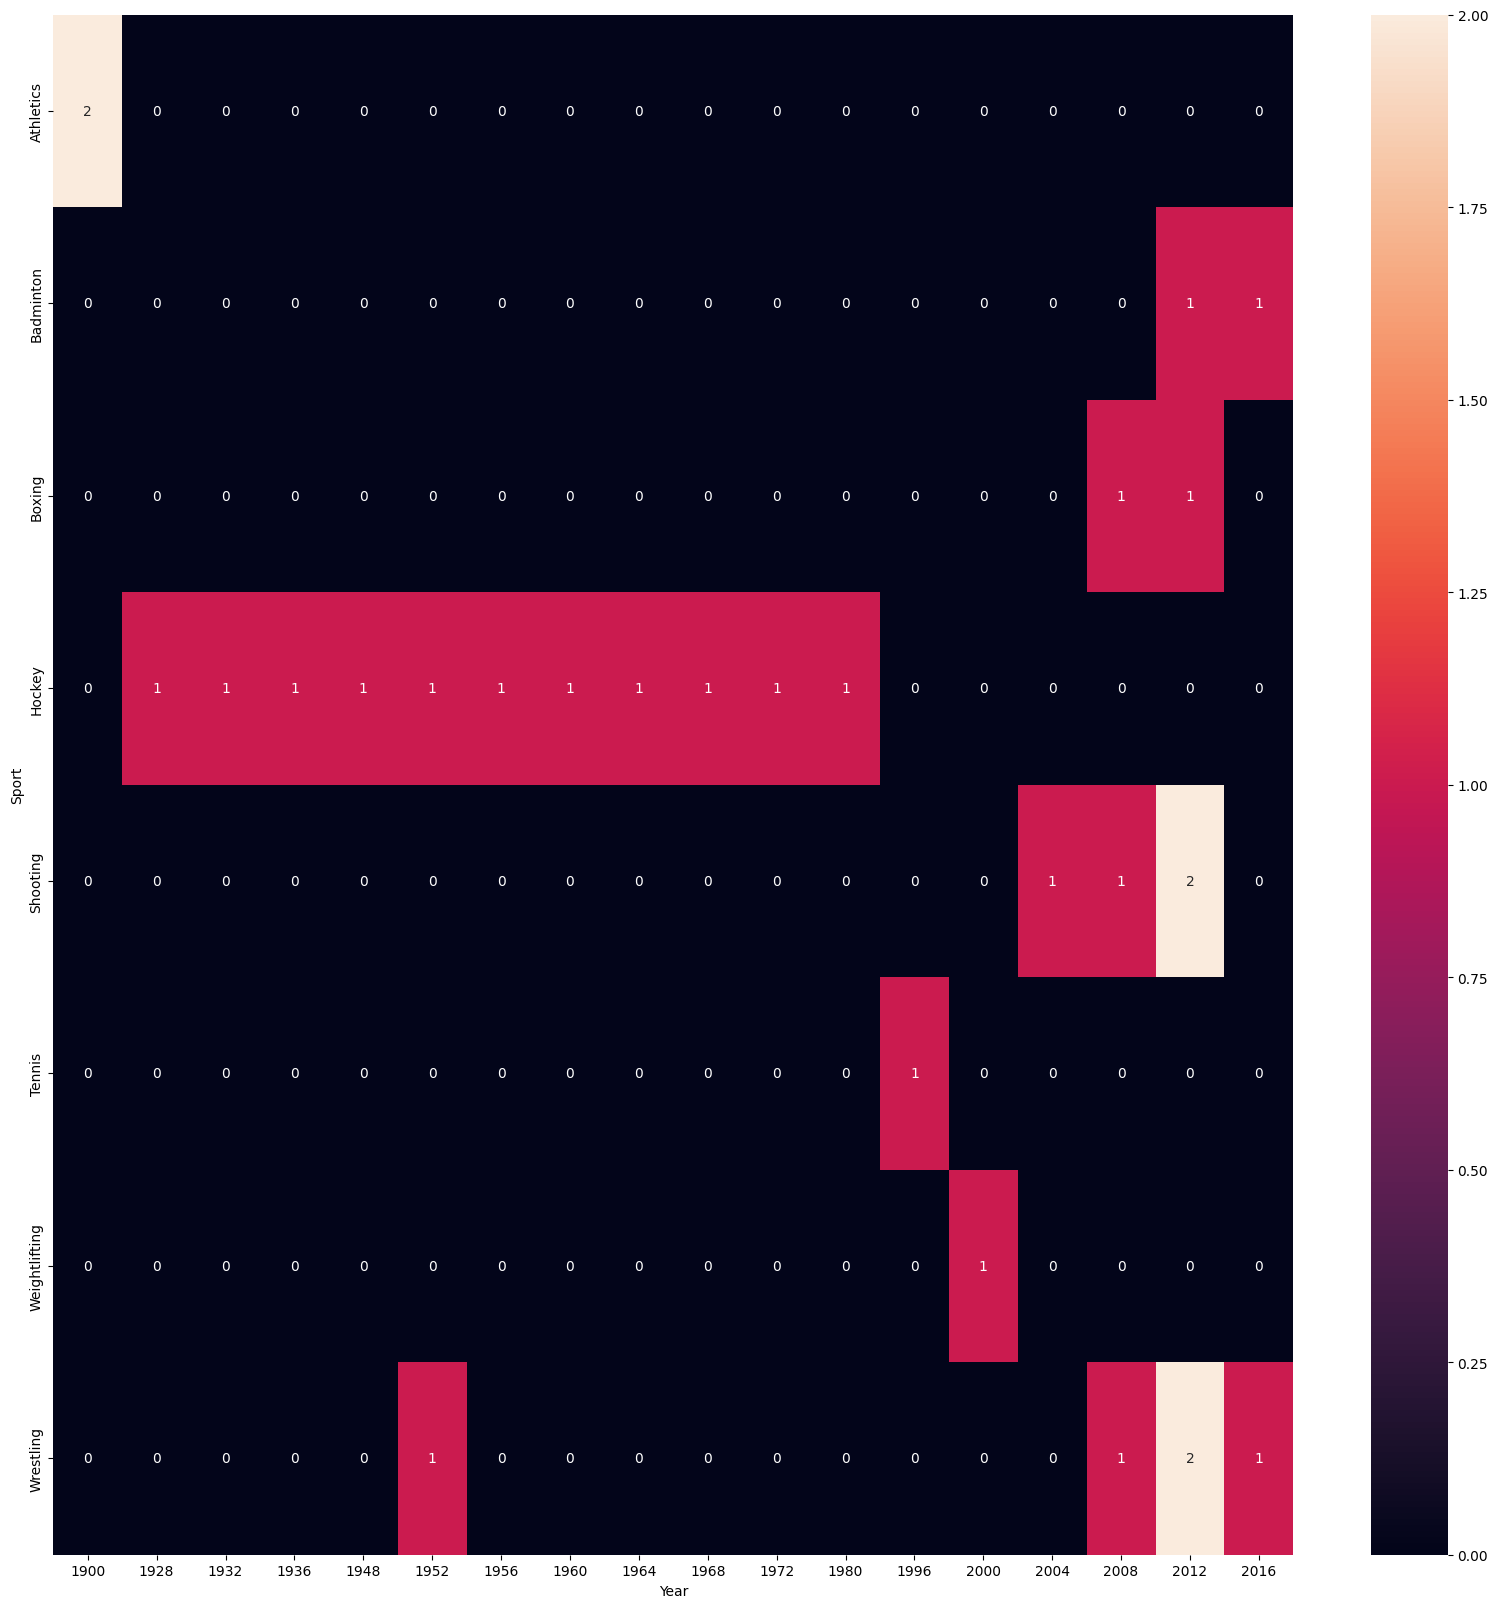

In [266]:
new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count')
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

# Athlete-wise analysis

In [267]:
import plotly.figure_factory as ff

In [274]:
new_athelets = athletes.drop_duplicates(subset=['Name','region'])

In [278]:
x1 = new_athelets['Age'].dropna()
x2 = new_athelets[new_athelets['Medal'] == 'Gold']['Age'].dropna()
x3 = new_athelets[new_athelets['Medal'] == 'Silver']['Age'].dropna()
x4 = new_athelets[new_athelets['Medal'] == 'Bronze']['Age'].dropna()

In [279]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [281]:
new_athelets.shape

(116885, 20)

In [282]:
new_athelets['Medal'].fillna('No Medal',inplace=True)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Python3

<Axes: xlabel='Weight', ylabel='Height'>

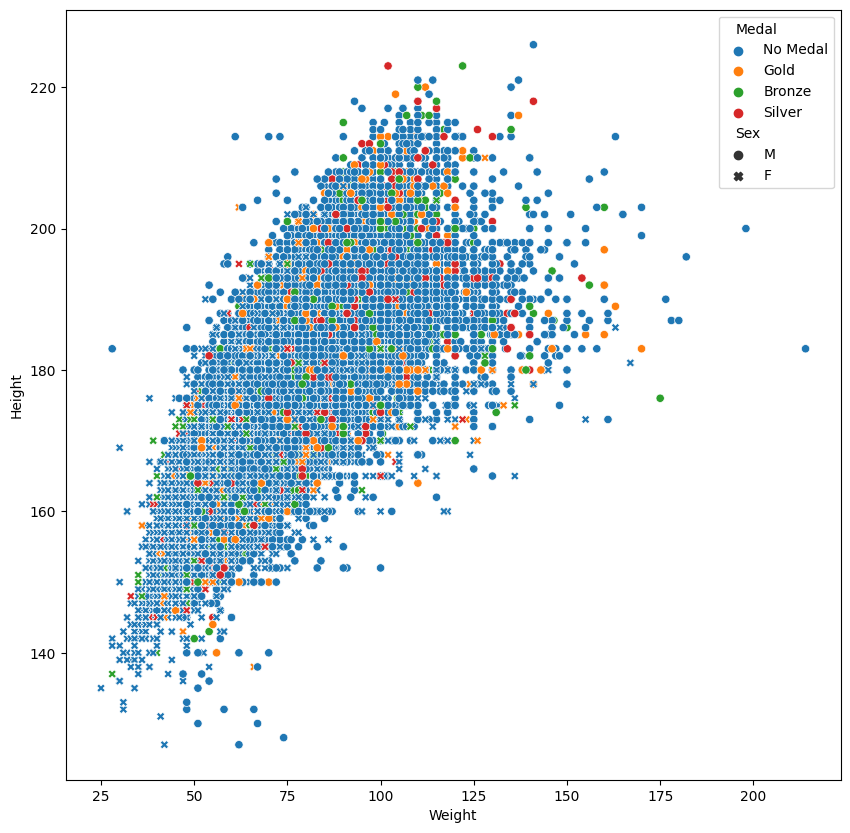

In [290]:
plt.figure(figsize=(10,10))
temp_df = new_athelets[new_athelets['Sport'] == 'Badminton']
sns.scatterplot(x='Weight', y='Height', hue='Medal',style='Sex' ,data=new_athelets)

In [394]:
def athletes_country(df,df1,country,sport):
    if sport == 'Overall' and country == 'Overall':
        temp_df = df
        temp_df1 = df1
    elif sport == 'Overall' and country != 'Overall':
        temp_df = df[df['region'] == country]
        temp_df1 = df1[df1['region'] == country]
    elif sport != 'Overall' and country == 'Overall':
        temp_df = df[df['Sport'] == sport]
        temp_df1 = df1[df1['region'] == sport]
    elif sport != 'Overall' and country != 'Overall':
        temp_df = df[(df['Sport'] == sport) & (df['region'] == country)]
        temp_df1 = df1[(df1['Sport'] == sport) & (df1['region'] == country)]

    total_athletes = temp_df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index()
    total_athletes.rename(columns={'count':'No of Athelets'},inplace=True)

    total_medal_athletes = temp_df1.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index()
    total_medal_athletes.rename(columns={'count':'No of Athelets'},inplace=True)

    return total_athletes,total_medal_athletes
    

In [375]:
medal_winning_athletes = athletes.dropna(subset=['Medal'])

In [382]:
medal_winning_athletes.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

In [385]:
medal_winning_athletes[(medal_winning_athletes['region'] == 'India') & (medal_winning_athletes['Year'] == 2016)].shape

(2, 20)

In [397]:
total_athletes,total_medal_athletes = athletes_country(athletes,medal_winning_athletes,'Overall','Overall')

In [409]:
print(total_athletes.head(3))
print(total_medal_athletes.head(3))

   Year  No of Athelets
0  2016           11174
1  2008           10880
2  2000           10639
   Year  No of Athelets
0  2012             893
1  2016             891
2  2008             882


In [410]:
final_athletes = total_athletes.merge(total_medal_athletes,on="Year")

In [413]:
final_athletes.head(3)

,Year,No of Athelets_x,No of Athelets_y
0,2016,11174,891
1,2008,10880,882
2,2000,10639,858


In [414]:
final_athletes.rename(columns={'No of Athelets_x':'total_athletes','No of Athelets_y':'medal_athletes'},inplace=True)

In [415]:
final_athletes.head(3)

,Year,total_athletes,medal_athletes
0,2016,11174,891
1,2008,10880,882
2,2000,10639,858


In [416]:
fig = px.line(final_athletes,x='Year',y=['total_athletes','medal_athletes'])
fig.show()

In [320]:
print(athletes.shape)
print(new_athelets.shape)  # unique athletes

(221167, 20)
(116885, 20)


# Men vs Women Athletes

In [489]:
athletes = athletes[athletes['region'] == 'India']
medal_winning_athletes = medal_winning_athletes[medal_winning_athletes['region'] == 'India']

In [490]:
men = athletes[athletes['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athletes[athletes['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [491]:
medal_men = medal_winning_athletes[medal_winning_athletes['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
medal_women = medal_winning_athletes[medal_winning_athletes['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [492]:
final = men.merge(women,on='Year',how='outer')
medal_final = medal_men.merge(medal_women,on='Year',how='outer')

In [493]:
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)
medal_final.rename(columns={'Name_x':'Medal_Male','Name_y':'Medal_Female'},inplace=True)

In [494]:
final.fillna(0,inplace=True)
medal_final.fillna(0,inplace=True)

In [495]:
final_medal = final.merge(medal_final,on='Year',how="outer")

In [496]:
final_medal

,Year,Male,Female,Medal_Male,Medal_Female
0,1900,5,0.0,2.0,0.0
1,1920,7,0.0,NaN,NaN
2,1924,22,2.0,NaN,NaN
3,1928,24,0.0,1.0,0.0
4,1932,26,0.0,1.0,0.0
5,1936,30,0.0,1.0,0.0
6,1948,89,0.0,1.0,0.0
7,1952,87,7.0,2.0,0.0
8,1956,78,1.0,1.0,0.0
9,1960,49,0.0,1.0,0.0


In [497]:
fig = px.line(final_medal,x='Year',y=['Male','Female','Medal_Male','Medal_Female'])
fig.show()

In [498]:
final_medal

,Year,Male,Female,Medal_Male,Medal_Female
0,1900,5,0.0,2.0,0.0
1,1920,7,0.0,NaN,NaN
2,1924,22,2.0,NaN,NaN
3,1928,24,0.0,1.0,0.0
4,1932,26,0.0,1.0,0.0
5,1936,30,0.0,1.0,0.0
6,1948,89,0.0,1.0,0.0
7,1952,87,7.0,2.0,0.0
8,1956,78,1.0,1.0,0.0
9,1960,49,0.0,1.0,0.0
